## Step 1: Loading the Dataset

In [15]:
import pandas as pd

# Define file path
file_path = r"C:\Users\Olajide FemVrich\Desktop\Just DATA\PYTHON\Data_Wrangling\Customer_Seg_Analysis\MOCK_DATA (3).csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display info
print(df.head())
print(f"\nDataset loaded with {len(df)} rows.")

   Customer ID                Country  Total Purchases  \
0         1015  Palestinian Territory               12   
1         1029                  China               47   
2         1025                Nigeria               10   
3         1006         United Kingdom               48   
4         1024            Philippines               16   

                    Sign-up Date  
0  2022-04-03 21:42:29.000000000  
1  2016-01-08 03:13:12.000000000  
2  2023-02-20 19:06:14.000000000  
3  2022-05-26 12:46:35.000000000  
4  2016-12-13 03:44:04.000000000  

Dataset loaded with 1000 rows.


In [16]:
# Load the dataset, keeping only the first 75% of rows
df = df.iloc[:int(len(df) * 0.75)]  

# Display info
print(df.head())
print(f"\nDataset loaded with {len(df)} rows.")


   Customer ID                Country  Total Purchases  \
0         1015  Palestinian Territory               12   
1         1029                  China               47   
2         1025                Nigeria               10   
3         1006         United Kingdom               48   
4         1024            Philippines               16   

                    Sign-up Date  
0  2022-04-03 21:42:29.000000000  
1  2016-01-08 03:13:12.000000000  
2  2023-02-20 19:06:14.000000000  
3  2022-05-26 12:46:35.000000000  
4  2016-12-13 03:44:04.000000000  

Dataset loaded with 750 rows.


## Step 2: Data Cleaning

In [17]:
import numpy as np

# 1 Remove consecutive duplicate rows
df = df.drop_duplicates(keep='first')

# 2 Convert 'Sign-up Date' to datetime format
df['Sign-up Date'] = pd.to_datetime(df['Sign-up Date'], errors='coerce')

# Replace all dates from the year 2020 with NaN
df.loc[df['Sign-up Date'].dt.year == 2020, 'Sign-up Date'] = np.nan

# 3 Drop rows where 'Total Purchases' is < 5 but only if the customer is from Canada
df = df[~((df['Total Purchases'] < 5) & (df['Country'] == 'Canada'))]

# Display cleaned dataset info
print(df.head())
print(f"\nDataset after cleaning: {len(df)} rows.")


   Customer ID                Country  Total Purchases        Sign-up Date
0         1015  Palestinian Territory               12 2022-04-03 21:42:29
1         1029                  China               47 2016-01-08 03:13:12
2         1025                Nigeria               10 2023-02-20 19:06:14
3         1006         United Kingdom               48 2022-05-26 12:46:35
4         1024            Philippines               16 2016-12-13 03:44:04

Dataset after cleaning: 748 rows.


## Step 3: Feature Engineering

In [18]:
from datetime import datetime

# 1 Calculate how many years the customer has been a member
current_year = datetime.today().year
df['Membership Years'] = current_year - df['Sign-up Date'].dt.year

# 2 Create the 'Loyalty Score' column based on the conditions using the function 'assign_loyalty_score()'
def assign_loyalty_score(row):
    if row['Total Purchases'] > 20:
        return 3
    elif 10 <= row['Total Purchases'] <= 20:
        return 2
    elif row['Total Purchases'] < 10:
        if row['Membership Years'] > 3:  # If they’ve been a member for more than 3 years
            return 2
        return 1

df['Loyalty Score'] = df.apply(assign_loyalty_score, axis=1)

# Display updated dataset
print(df.head())

   Customer ID                Country  Total Purchases        Sign-up Date  \
0         1015  Palestinian Territory               12 2022-04-03 21:42:29   
1         1029                  China               47 2016-01-08 03:13:12   
2         1025                Nigeria               10 2023-02-20 19:06:14   
3         1006         United Kingdom               48 2022-05-26 12:46:35   
4         1024            Philippines               16 2016-12-13 03:44:04   

   Membership Years  Loyalty Score  
0               3.0              2  
1               9.0              3  
2               2.0              2  
3               3.0              3  
4               9.0              2  


## Step 4: Data Aggregation & Filtering

In [28]:
# 1 Group by 'Country' and calculate average & max 'Total Purchases'
purchase_stats = df.groupby('Country')['Total Purchases'].agg(['mean', 'max']).reset_index()

# 2 Calculate the most common 'Loyalty Score' per country (excluding Mexico)

loyalty_mode = df[df['Country'] != 'Mexico'].groupby('Country')['Loyalty Score'].agg(lambda x: x.mode()[0]).reset_index()

# 3 Merge both aggregations
country_summary = purchase_stats.merge(loyalty_mode, on='Country')

# Rename columns for clarity
country_summary.columns = ['Country', 'Avg Total Purchases', 'Max Total Purchases', 'Most Common Loyalty Score']

# Display the summary
print(country_summary.head())
print("\nData aggregation completed")

       Country  Avg Total Purchases  Max Total Purchases  \
0  Afghanistan             8.000000                   20   
1      Albania            20.500000                   38   
2      Andorra            11.000000                   11   
3       Angola            15.000000                   29   
4    Argentina            24.692308                   45   

   Most Common Loyalty Score  
0                          2  
1                          2  
2                          2  
3                          2  
4                          3  

Data aggregation completed


# Descriptive Analysis

## 1. Identifying the Most Loyal Customers

In [20]:
# Find customers with the highest loyalty score
most_loyal_customers = df[df['Loyalty Score'] == 3]

# Count most loyal customers per country
loyalty_distribution = most_loyal_customers['Country'].value_counts()

# Display results
print(f"Total number of highly loyal customers: {len(most_loyal_customers)}\n")
print("Loyal Customer Distribution by Country:\n")
print(loyalty_distribution)


Total number of highly loyal customers: 420

Loyal Customer Distribution by Country:

Country
China          95
Indonesia      50
Russia         26
Brazil         20
Philippines    18
               ..
Uzbekistan      1
Hungary         1
Ethiopia        1
Mauritius       1
Angola          1
Name: count, Length: 87, dtype: int64


## 2. Descriptive Statistics on Customer Purchases

In [21]:
# Descriptive statistics on 'Total Purchases'
purchase_stats = df['Total Purchases'].describe()

# Display results
print("\n Customer Purchase Statistics:\n")
print(purchase_stats)



 Customer Purchase Statistics:

count    748.000000
mean      23.891711
std       13.899728
min        1.000000
25%       12.000000
50%       24.000000
75%       36.000000
max       48.000000
Name: Total Purchases, dtype: float64


## 3. Customer Purchase Behavior by Country

In [22]:
# Group by country and calculate mean & max purchases
country_purchase_stats = df.groupby('Country')['Total Purchases'].agg(['mean', 'max']).sort_values(by='mean', ascending=False)

# Display results
print("\nCountry-Wise Purchase Behavior:\n")
print(country_purchase_stats)



Country-Wise Purchase Behavior:

              mean  max
Country                
Australia     47.0   47
Tunisia       44.0   44
Israel        44.0   44
Fiji          44.0   44
South Korea   41.0   41
...            ...  ...
Uganda         3.5    6
Jamaica        3.0    3
Bolivia        3.0    3
Bermuda        3.0    3
Sierra Leone   2.0    2

[112 rows x 2 columns]


## 4. Purchase Trends Over Time

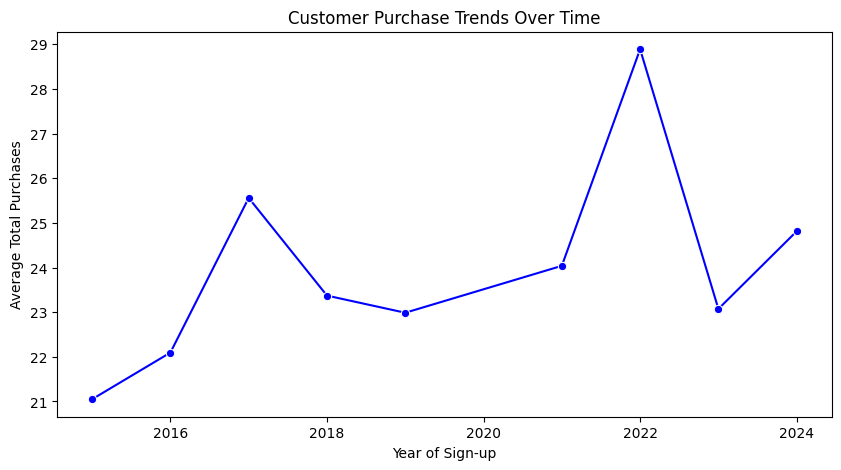

In [24]:
import matplotlib.pyplot as plt

# Extract year from 'Sign-up Date' and analyze purchase trends over time
df['Sign-up Year'] = df['Sign-up Date'].dt.year

# Group by year and calculate average purchases
purchase_trends = df.groupby('Sign-up Year')['Total Purchases'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=purchase_trends.index, y=purchase_trends.values, marker='o', color='b')
plt.xlabel("Year of Sign-up")
plt.ylabel("Average Total Purchases")
plt.title("Customer Purchase Trends Over Time")
plt.show()


# Step 5: Data Export

In [29]:
import datetime
import random

# 1 Generate the filename using today's date in reverse order (DD-MM-YYYY)
today_date = datetime.datetime.today().strftime('%d-%m-%Y')
filename = f"processed_data_{today_date}.csv"

# 2 Select only the required columns
final_df = df[['Customer ID', 'Loyalty Score', 'Country', 'Total Purchases']]

# 3 Save to CSV
final_df.to_csv(filename, index=False)
print(f"\nData successfully saved as {filename}")

# 4 Shuffle and display the first 10 rows
shuffled_df = final_df.sample(frac=1, random_state=42).head(10)
print("\nFirst 10 randomly shuffled rows:")
print(shuffled_df)


Data successfully saved as processed_data_20-03-2025.csv

First 10 randomly shuffled rows:
     Customer ID  Loyalty Score      Country  Total Purchases
582         1025              3      Finland               42
357         1025              3     Ethiopia               37
133         1009              2      Nigeria               10
251         1000              3        China               21
300         1029              3    Indonesia               30
389         1017              3       Brazil               34
337         1007              2       Brazil               10
155         1031              3      Finland               39
529         1012              3  Philippines               28
736         1014              3  Philippines               22


# Report

In [26]:
from IPython.display import display, Markdown

# Markdown summary
report = f"""
# Customer Segmentation Analysis Report 

## Summary of Findings
1. **Data Cleaning**: 
   - Loaded 75% of the dataset.
   - Removed consecutive duplicate rows.
   - Converted the "Sign-up Date" column and replaced 2020 values with NaN.
   - Dropped customers from Canada with less than 5 purchases.

2. **Feature Engineering**:
   - Created a "Loyalty Score" based on total purchases and membership duration.

3. **Data Aggregation**:
   - Calculated average and maximum purchases per country.
   - Identified the most common loyalty score, excluding Mexico.

4. **Exporting & Reporting**:
   - Processed data saved as `"processed_data_{today_date}.csv"`.
   - Displayed a randomly shuffled preview of 10 customers.

## Key Insights  
- **China and Indonesia** have the highest number of highly loyal customers (**95** and **50**, respectively).  
- A total of **420 customers** were classified as highly loyal.  
- **Russia, Brazil, and the Philippines** also have notable loyal customer counts.  
- **Mexico was excluded** from loyalty score analysis.  
- Customers with **3+ years of membership** received a **loyalty boost** based on purchases.  
- The **average number of purchases per customer** is **23.89**, with a **standard deviation of 13.90**, showing varied purchasing behavior.  
- **Australia, Tunisia, Israel, Fiji, and South Korea** have the highest **average purchase rates (41-47 purchases per customer)**.  
- **Sierra Leone, Bermuda, Bolivia, Jamaica, and Uganda** have the lowest purchase activity, with **less than 4 purchases on average**.  
- **Generally Customer purchase trends shows an upward direction but it has fluctuated over time**, with:  
  - A **peak in 2017**  
  - A **decline from 2018 to 2021**  
  - A **sharp rise in 2022**
  - A **significant drop in 2023**
"""

#  Display Markdown report
display(Markdown(report))


# Customer Segmentation Analysis Report 

## Summary of Findings
1. **Data Cleaning**: 
   - Loaded 75% of the dataset.
   - Removed consecutive duplicate rows.
   - Converted the "Sign-up Date" column and replaced 2020 values with NaN.
   - Dropped customers from Canada with less than 5 purchases.

2. **Feature Engineering**:
   - Created a "Loyalty Score" based on total purchases and membership duration.

3. **Data Aggregation**:
   - Calculated average and maximum purchases per country.
   - Identified the most common loyalty score, excluding Mexico.

4. **Exporting & Reporting**:
   - Processed data saved as `"processed_data_20-03-2025.csv"`.
   - Displayed a randomly shuffled preview of 10 customers.

## Key Insights  
- **China and Indonesia** have the highest number of highly loyal customers (**95** and **50**, respectively).  
- A total of **420 customers** were classified as highly loyal.  
- **Russia, Brazil, and the Philippines** also have notable loyal customer counts.  
- **Mexico was excluded** from loyalty score analysis.  
- Customers with **3+ years of membership** received a **loyalty boost** based on purchases.  
- The **average number of purchases per customer** is **23.89**, with a **standard deviation of 13.90**, showing varied purchasing behavior.  
- **Australia, Tunisia, Israel, Fiji, and South Korea** have the highest **average purchase rates (41-47 purchases per customer)**.  
- **Sierra Leone, Bermuda, Bolivia, Jamaica, and Uganda** have the lowest purchase activity, with **less than 4 purchases on average**.  
- **Generally Customer purchase trends shows an upward direction but it has fluctuated over time**, with:  
  - A **peak in 2017**  
  - A **decline from 2018 to 2021**  
  - A **sharp rise in 2022**
  - A **very sharp drop in 2023**
